# A toy example for using pyrpca

**Author**: Roland Kwitt, Kitware Inc., 2013 (roland.kwitt@kitware.com, rkwitt@gmx.at)

Our problem setting is as follows: We want to load an image (which we know is low-rank due to it's structure), then corrupt the image with random outliers and eventually recover the low-rank part (i.e., the original image).

Let's load ```SimpleITK``` and ```numpy``` first:

In [25]:
import SimpleITK as sitk
import numpy as np

We'll tackle the task using ```ialm```, i.e., the **Inexact Lagrangian Multipier (IALM)** approach:

In [26]:
import sys
sys.path.append('../../')
import pyLAR.alm.ialm as ialm
import pyLAR.alm.ealm as ealm

How did you start Notebook
--------------------------

When starting this notebook using this:
```bash
~/tutorial-env/bin/ipython notebook --pylab=inline
```
comment out the code in the following cell.

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


We next load a checkerboard image (our **low-rank** signal):

In [29]:
I = sitk.ReadImage("../../data/checkerboard.png")

In [30]:
Inp = sitk.GetArrayFromImage(I)

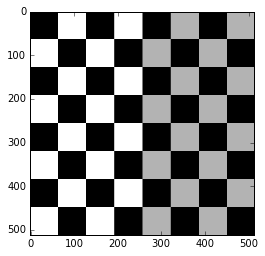

In [31]:
imshow(Inp, cm.gray)

As we can see, the image has a very distinctive structure. In the following, we'll corrupt **30%** of the pixel values by pertubing the signal with values in the range **[190, 210]**. The **outliers will be uniformly distributed**.

In [32]:
N = np.prod(Inp.shape)
p = 0.3
how_many = np.round(N*p)
outliers = np.round(np.random.uniform(-10, 10, how_many))

/home/fbudin/tutorial-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [33]:
where = np.random.random_integers(0, N-1, how_many)

/home/fbudin/tutorial-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


We create a copy of the original image and set the outliers:

In [34]:
Inp_corrupted = np.copy(Inp)

In [35]:
Inp_corrupted.ravel()[where] = np.array(200 + outliers, dtype=np.uint8)

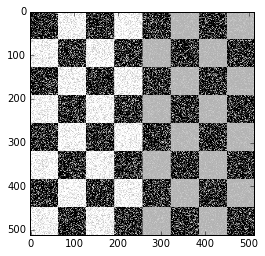

In [36]:
imshow(Inp_corrupted, cm.gray)

We'll run IALM (with it's default settings) on the image next which gives us the low-rank and the sparse (hopefully the outliers) signal parts:

In [ ]:
res = ialm.recover(Inp_corrupted)
low_rank = res[0]
sparse = res[1]

In [ ]:
imshow(low_rank, cm.gray)

In [ ]:
imshow(sparse, cm.gray)

In [ ]:
# compute Frobenius norm of low-rank part minus the original signal
error = np.linalg.norm(low_rank-Inp,ord='fro')
print error

In [ ]:
# compute Frobenius norm
error = np.linalg.norm(np.abs(np.round(low_rank))-Inp,'fro')
print error

So, in the end, we could perfectly separate the low-rank and sparse part of this signal.